Cross-validation scores for each fold: [1.         1.         0.93333333 0.9        0.96666667]
Average accuracy: 0.96

Predicted Species for sample: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


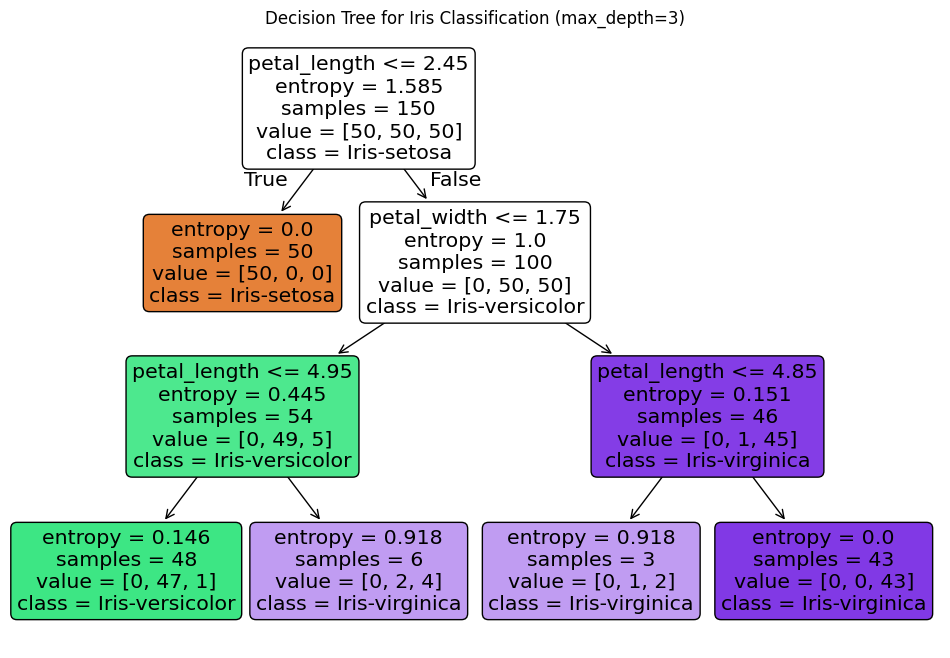

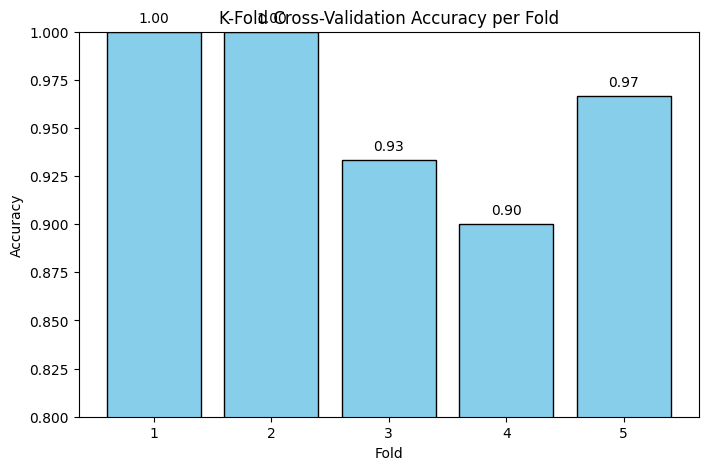

In [11]:
# iris_decision_tree_kfold_plot_barchart.py

import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("/content/IRIS.csv")

# 2. Encode species labels
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# 3. Features & target
X = df.drop('species', axis=1)
y = df['species']

# 4. Decision Tree with pruning
model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,       # avoid overfitting
    min_samples_split=4,
    random_state=42
)

# 5. K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kfold)

print("Cross-validation scores for each fold:", scores)
print("Average accuracy:", np.mean(scores))

# 6. Train final model on full dataset
model.fit(X, y)

# 7. Predict for custom input
sample_data = [[5.1, 3.5, 1.4, 0.2]]
predicted_species = label_encoder.inverse_transform(model.predict(sample_data))
print("\nPredicted Species for sample:", predicted_species[0])

# 8. Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Iris Classification (max_depth=3)")
plt.show()

# 9. Plot accuracy per fold
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(scores) + 1), scores, color='skyblue', edgecolor='black')
plt.ylim(0.8, 1.0)
plt.xticks(range(1, len(scores) + 1))
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("K-Fold Cross-Validation Accuracy per Fold")
for i, v in enumerate(scores):
    plt.text(i + 1, v + 0.005, f"{v:.2f}", ha='center')
plt.show()
